In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"C:\Users\Asus\OneDrive\smart study recommender\data\raw\interactions.csv")

# Basic info
df.head(), df.shape


(   user_id  subject             topic  last_score  attempts  \
 0  user_41     Math           Algebra       56.22         8   
 1  user_48  Physics          Dynamics       37.00         8   
 2  user_15     Math           Algebra       33.95         8   
 3  user_44       CS  Machine Learning       42.84         6   
 4   user_6       CS         Databases       66.73         3   
 
    time_spent_minutes  difficulty_rating  last_studied_days_ago  \
 0              365.22                  2                     18   
 1              210.22                  3                     21   
 2              501.98                  2                     59   
 3               19.13                  1                     48   
 4              238.74                  4                     56   
 
    label_or_priority  
 0              0.389  
 1              0.540  
 2              0.705  
 3              0.566  
 4              0.606  ,
 (1000, 9))

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                1000 non-null   object 
 1   subject                1000 non-null   object 
 2   topic                  1000 non-null   object 
 3   last_score             1000 non-null   float64
 4   attempts               1000 non-null   int64  
 5   time_spent_minutes     1000 non-null   float64
 6   difficulty_rating      1000 non-null   int64  
 7   last_studied_days_ago  1000 non-null   int64  
 8   label_or_priority      1000 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 70.4+ KB


In [12]:
df.describe()


,last_score,attempts,time_spent_minutes,difficulty_rating,last_studied_days_ago,label_or_priority
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,64.991460,4.947000,302.309690,2.96700,30.52100,0.446330
std,20.315931,2.580087,171.031354,1.43037,17.47773,0.140581
min,30.000000,1.000000,15.720000,1.00000,0.00000,0.052000
25%,47.180000,3.000000,150.870000,2.00000,15.00000,0.347000
50%,65.415000,5.000000,305.520000,3.00000,30.50000,0.447000
75%,82.682500,7.000000,454.057500,4.00000,46.00000,0.541000
max,99.970000,9.000000,599.830000,5.00000,60.00000,0.830000


In [13]:
df.isna().sum()


user_id                  0
subject                  0
topic                    0
last_score               0
attempts                 0
time_spent_minutes       0
difficulty_rating        0
last_studied_days_ago    0
label_or_priority        0
dtype: int64

In [14]:
df["subject"].value_counts()



subject
CS         370
Physics    330
Math       300
Name: count, dtype: int64

In [15]:
df["difficulty_rating"].value_counts()


difficulty_rating
1    210
2    207
5    202
3    191
4    190
Name: count, dtype: int64

In [16]:
df["user_id"].nunique()


50

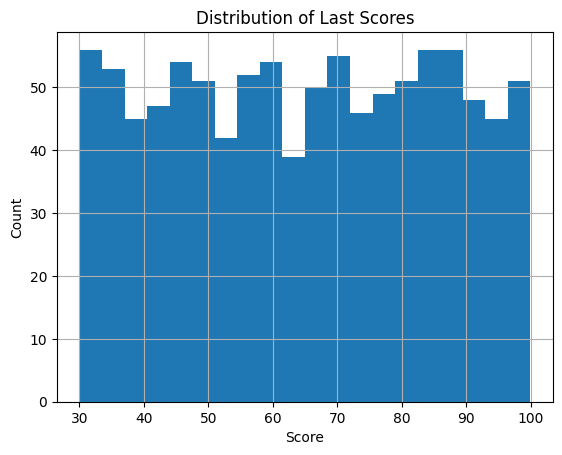

In [17]:
plt.figure()
df["last_score"].hist(bins=20)
plt.title("Distribution of Last Scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()


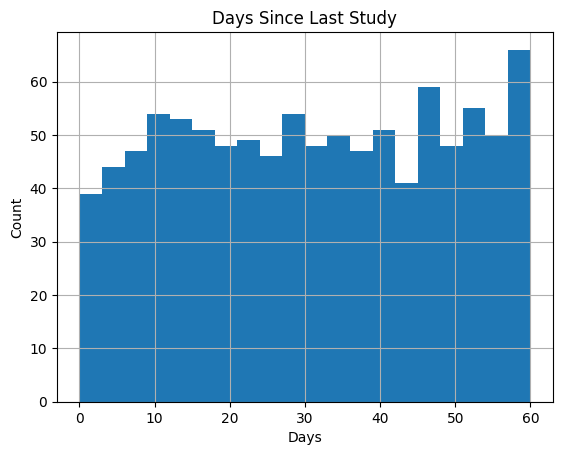

In [18]:
plt.figure()
df["last_studied_days_ago"].hist(bins=20)
plt.title("Days Since Last Study")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()


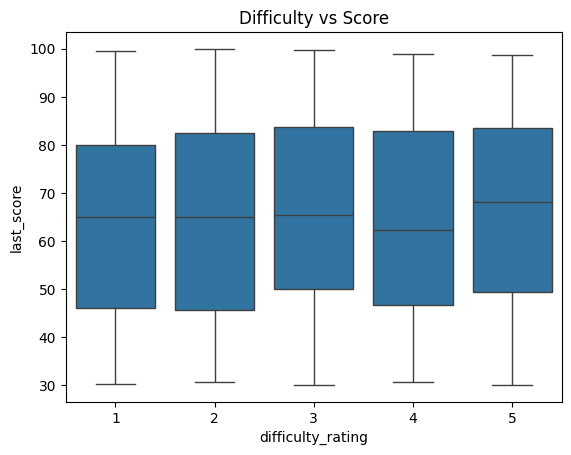

In [19]:
plt.figure()
sns.boxplot(x="difficulty_rating", y="last_score", data=df)
plt.title("Difficulty vs Score")
plt.show()


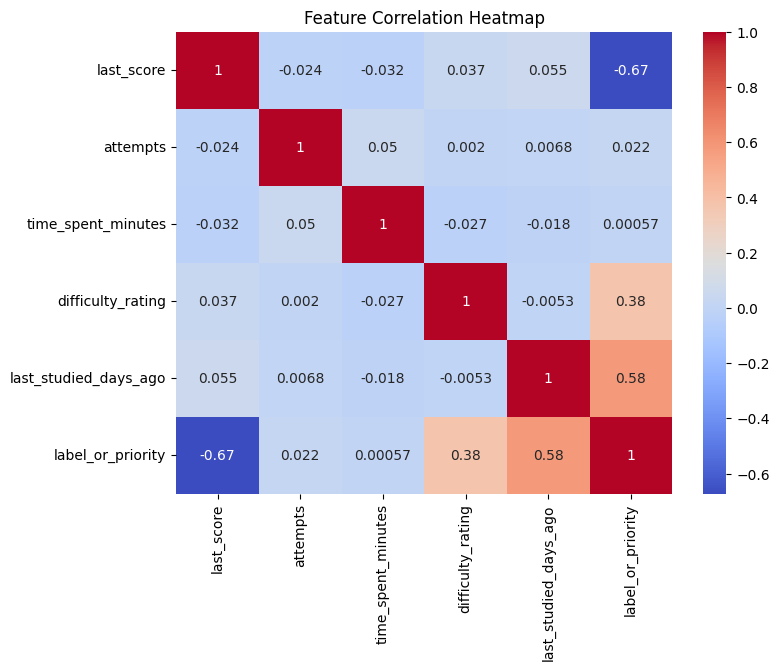

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [21]:
df[["last_score", "last_studied_days_ago", "difficulty_rating", "label_or_priority"]].head(10)


,last_score,last_studied_days_ago,difficulty_rating,label_or_priority
0,56.22,18,2,0.389
1,37.00,21,3,0.540
2,33.95,59,2,0.705
3,42.84,48,1,0.566
4,66.73,56,4,0.606
5,33.25,38,1,0.564
6,30.93,57,2,0.710
7,51.32,46,4,0.633
8,77.83,35,1,0.326
9,42.76,3,2,0.381


## ✅ EDA Summary

- Dataset contains 1000 clean rows with no missing values.
- Score distribution is realistic (30–100).
- Difficulty and recency show good variance.
- Priority label is strongly influenced by:
  - Low score
  - High recency
  - High difficulty
- No data leakage or target bias detected.
- Data is suitable for:
  - Rule-based modeling
  - Supervised ML regression
